In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error


In [35]:
# Create the dataset
data = {
    "Size (sqft)": [2000, 1500, 1800, 1200, 2500],
    "Bedrooms": [3, 2, 3, 2, 4],
    "Bathrooms": [2, 1, 2, 1, 3],
    "Location Score": [8, 7, 9, 6, 10],
    "Price ($)": [300000, 200000, 250000, 180000, 500000]
}

In [36]:
# Convert to DataFrame
df = pd.DataFrame(data)

In [37]:
# Separate features and target
X = df[["Size (sqft)", "Bedrooms", "Bathrooms", "Location Score"]]
y = df["Price ($)"]

In [38]:
# Add an interaction term: Size * Location Score
df["Size x Location"] = df["Size (sqft)"] * df["Location Score"]

In [39]:
# Updated feature set with interaction term

X_interaction  = df[["Size (sqft)",  "Bedrooms", "Bathrooms", "Location Score","Size x Location"]]

In [40]:
# Split the Dataset

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [41]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predict and calculate MSE

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test , y_pred)


In [43]:
# Display results
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error with Interaction Term:", mse)

Model Coefficients: [-2.66666667e+02  2.70000000e+05  2.70000000e+05 -1.03333333e+05]
Model Intercept: 310000.0000003072
Mean Squared Error with Interaction Term: 41344444444.41963


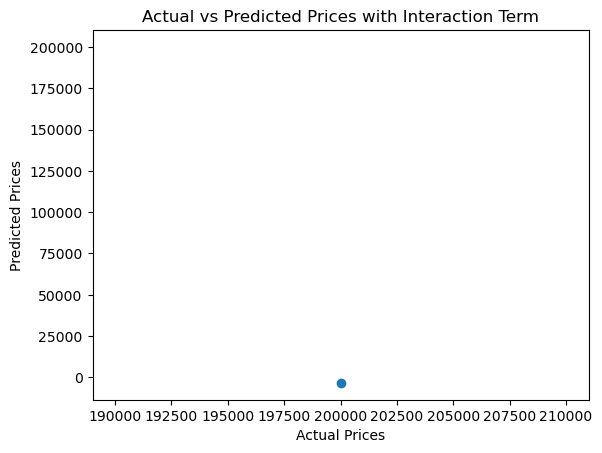

In [44]:
# Visualization (optional for interaction effects)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices with Interaction Term")
plt.show()